# FoNS Datathon 2021 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *


In [2]:
train_descriptors = pd.read_csv("train_descriptors.csv")
train_mord3d = pd.read_csv("train_mord3d.csv")
train_morgan = pd.read_csv("train_morgan.csv")
train_rdk = pd.read_csv("train_rdk.csv")

train_crystals = pd.read_csv("train_crystals.csv")
train_distances = pd.read_csv("train_distances.csv")
train_centroid_distances = pd.read_csv("train_centroid_distances.csv")

In [3]:
test_descriptors = pd.read_csv("test_descriptors.csv")
test_mord3d = pd.read_csv("test_mord3d.csv")
test_morgan = pd.read_csv("test_morgan.csv")
test_rdk = pd.read_csv("test_rdk.csv")

### Data pre-processing

In [4]:
train_descriptors_full = train_descriptors.iloc[:, 3:-2].dropna(axis= 1, how="any")
train_descriptors_full.shape

(13449, 984)

In [5]:
test_descriptors_full = test_descriptors[train_descriptors_full.columns]
test_descriptors_full.shape

(3363, 984)

In [6]:
train_PCA = decomposition.PCA(n_components=.95)
scaler_for_PCA = preprocessing.StandardScaler()
train_descriptors_PCA = train_PCA.fit_transform(scaler_for_PCA.fit_transform(train_descriptors_full))
test_descriptors_PCA = train_PCA.transform(scaler_for_PCA.transform(test_descriptors_full))
print(train_descriptors_PCA.shape, test_descriptors_PCA.shape)

(13449, 124) (3363, 124)


### A (very!!) simple and bad model

In [7]:
target = "a"
model = linear_model.LinearRegression()
model.fit(train_descriptors_PCA, train_crystals[target])

LinearRegression()

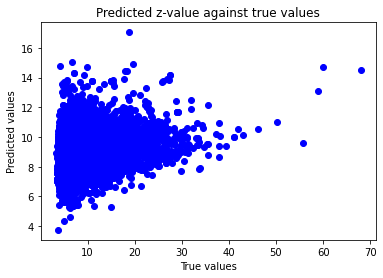

In [8]:
predictions = model.predict(train_descriptors_PCA)
plt.plot(train_crystals[target], predictions, "bo")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted z-value against true values")
plt.show()

### Cross-validation to evaluate the model's performance

In [9]:
cv_scores = model_selection.cross_val_score(
    model, 
    train_descriptors_PCA, 
    train_crystals[target], 
    scoring="neg_mean_absolute_error")

print("Average negative MAE:", round(np.mean(cv_scores), 3))
print("Standard deviation:", round(np.std(cv_scores), 3))

Average negative MAE: -3.258
Standard deviation: 0.05


### Outputting predictions for automated checking 
Link: https://github.com/stevenkbennett/fons_datathon_testing

In [10]:
predictions = model.predict(test_descriptors_PCA)

In [11]:
np.savetxt("task_x_predictions.csv", predictions)
# Alternatively, if using pandas, you can use the following:
pd.DataFrame(predictions).to_csv("task_x_predictions.csv", header=False, index=False)